In [58]:
import pandas as pd
import numpy as np

In [59]:
image_info = pd.read_csv('./末日素材数据导出.csv')

In [60]:
image_info.shape

(29999, 13)

In [61]:
image_info.head()

,source_id,label_id,content,image_id,image_name,amount,tdate_type,tdate,平台,游戏名称,投放人,media_id,create_time
0,380966,13,坦克：突突突,21586,ZDZL1000-横版泛素材ZDC,106.94,day,2020-11-07 00:00:00,iOS,废土战争,周樱,10,2020-05-20 18:29:05
1,380966,13,坦克：突突突,21586,ZDZL1000-横版泛素材ZDC,203.67,day,2020-11-08 00:00:00,iOS,废土战争,周樱,10,2020-05-20 18:29:05
2,380966,13,坦克：突突突,21586,ZDZL1000-横版泛素材ZDC,23.18,day,2020-11-09 00:00:00,iOS,废土战争,周樱,10,2020-05-20 18:29:05
3,381640,13,坦克：突突突,21586,ZDZL1000-横版泛素材ZDC,337.08,day,2020-11-06 00:00:00,iOS,废土战争,周樱,10,2020-05-20 18:29:05
4,381640,13,坦克：突突突,21586,ZDZL1000-横版泛素材ZDC,171.50,day,2020-11-07 00:00:00,iOS,废土战争,周樱,10,2020-05-20 18:29:05


In [64]:
image_info.sort_values('tdate')

,source_id,label_id,content,image_id,image_name,amount,tdate_type,tdate,平台,游戏名称,投放人,media_id,create_time
9695,283778,20,末日：小游戏,20700,SSR976-竖版(2D),2100.53,day,2020-03-20 00:00:00,安卓,末日危城-联运,侯绍鑫,32,2020-03-19 20:00:35
9683,283751,20,末日：小游戏,20700,SSR976-竖版(2D),1500.00,day,2020-03-20 00:00:00,安卓,末日危城-联运,杨峰,10,2020-03-19 20:00:35
9727,283919,20,末日：小游戏,20700,SSR976-竖版(2D),2535.85,day,2020-03-20 00:00:00,安卓,末日危城-联运,蔡金城,10,2020-03-19 20:00:35
9696,283778,20,末日：小游戏,20700,SSR976-竖版(2D),0.05,day,2020-03-21 00:00:00,安卓,末日危城-联运,侯绍鑫,32,2020-03-19 20:00:35
9684,283751,20,末日：小游戏,20700,SSR976-竖版(2D),0.00,day,2020-03-21 00:00:00,安卓,末日危城-联运,杨峰,10,2020-03-19 20:00:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27926,345395,20,末日：小游戏,23552,SSR1419-横版（3D混剪）,0.00,day,2020-12-04 00:00:00,安卓,末日危城-联运,范平凡,10,2020-07-16 21:52:26
9682,398957,25,末日-3D策略,26248,SSR1886-横版（3d混剪),196.79,day,2020-12-04 00:00:00,iOS,废土战争,江婷,16,2020-11-03 17:25:21
22310,337322,20,末日：小游戏,23552,SSR1419-横版（3D混剪）,0.00,day,2020-12-04 00:00:00,iOS,废土战争,任然,10,2020-07-16 21:52:26
23829,338535,20,末日：小游戏,21935,SSR1223-竖版（3D混剪-1117换颜色）,0.00,day,2020-12-04 00:00:00,iOS,废土战争,范平凡,10,2020-05-26 12:39:13


In [67]:
groups = image_info.groupby(['image_id','label_id','create_time','tdate'])

In [68]:
image_date_amount = groups['amount'].agg([('image_date_amount_sum','sum')]).reset_index()

In [69]:
image_date_amount.head()

,image_id,label_id,create_time,tdate,image_date_amount_sum
0,20700,20,2020-03-19 20:00:35,2020-03-20 00:00:00,6136.38
1,20700,20,2020-03-19 20:00:35,2020-03-21 00:00:00,2535.90
2,20700,20,2020-03-19 20:00:35,2020-03-22 00:00:00,2535.85
3,20700,20,2020-03-19 20:00:35,2020-03-23 00:00:00,0.00
4,20700,20,2020-03-19 20:00:35,2020-03-24 00:00:00,0.00


In [70]:
image_date_amount['tdate'] = pd.to_datetime(image_date_amount['tdate'])

In [71]:
image_date_amount = image_date_amount[image_date_amount['image_date_amount_sum']>0]

In [72]:
image_date_amount['group_tdate_sort']=image_date_amount['tdate'].groupby(image_date_amount['image_id']).rank(ascending=True,method='first')

In [73]:
image_date_amount.head()

,image_id,label_id,create_time,tdate,image_date_amount_sum,group_tdate_sort
0,20700,20,2020-03-19 20:00:35,2020-03-20,6136.38,1.0
1,20700,20,2020-03-19 20:00:35,2020-03-21,2535.90,2.0
2,20700,20,2020-03-19 20:00:35,2020-03-22,2535.85,3.0
32,20700,20,2020-03-19 20:00:35,2020-05-07,1635.74,4.0
34,20700,20,2020-03-19 20:00:35,2020-05-09,5287.65,5.0


In [101]:
image_date_amount.shape

(2211, 7)

In [104]:
image_date_amount['group_image_sort'] = image_date_amount['image_date_amount_sum'].groupby(image_date_amount['image_id']).rank(ascending=False)

In [105]:
image_date_amount.head()

,image_id,label_id,create_time,tdate,image_date_amount_sum,group_tdate_sort,amount_sort,group_image_sort
0,20700,20,2020-03-19 20:00:35,2020-03-20,6136.38,1.0,2,26.0
1,20700,20,2020-03-19 20:00:35,2020-03-21,2535.90,2.0,2,41.0
2,20700,20,2020-03-19 20:00:35,2020-03-22,2535.85,3.0,2,42.0
3,20700,20,2020-03-19 20:00:35,2020-05-07,1635.74,4.0,2,46.0
4,20700,20,2020-03-19 20:00:35,2020-05-09,5287.65,5.0,2,31.0


In [106]:
image_amount_max = image_date_amount[image_date_amount['group_image_sort']==1]

In [107]:
image_amount_max.head()

,image_id,label_id,create_time,tdate,image_date_amount_sum,group_tdate_sort,amount_sort,group_image_sort
16,20700,20,2020-03-19 20:00:35,2020-05-22,19565.28,17.0,2,1.0
56,21369,25,2020-05-11 19:52:44,2020-05-12,227.86,1.0,4,1.0
57,21397,20,2020-05-12 20:32:07,2020-05-13,2213.21,1.0,4,1.0
63,21500,27,2020-05-15 15:33:56,2020-05-20,36124.65,6.0,3,1.0
115,21503,25,2020-05-15 16:38:28,2020-05-18,5855.88,1.0,4,1.0


In [109]:
image_amount_max.sort_values('group_tdate_sort',ascending=False)

,image_id,label_id,create_time,tdate,image_date_amount_sum,group_tdate_sort,amount_sort,group_image_sort
677,22278,27,2020-06-13 08:54:57,2020-07-12,21909.58,30.0,2,1.0
1392,23698,25,2020-07-21 19:28:19,2020-08-10,28028.61,19.0,2,1.0
2072,24775,25,2020-09-04 11:40:45,2020-09-22,9055.68,18.0,3,1.0
391,22031,27,2020-05-29 17:09:07,2020-06-25,3996.92,18.0,4,1.0
16,20700,20,2020-03-19 20:00:35,2020-05-22,19565.28,17.0,2,1.0
...,...,...,...,...,...,...,...,...
1646,23887,26,2020-08-01 15:02:40,2020-08-03,3076.63,1.0,4,1.0
115,21503,25,2020-05-15 16:38:28,2020-05-18,5855.88,1.0,4,1.0
1774,24170,20,2020-08-07 10:05:29,2020-08-07,888.17,1.0,4,1.0
1794,24233,20,2020-08-10 17:03:54,2020-08-11,6145.51,1.0,4,1.0


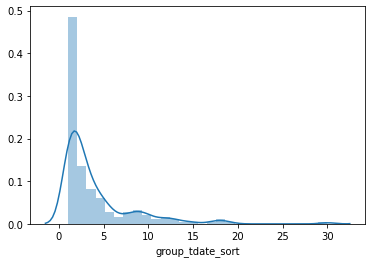

In [110]:
sns.distplot(image_amount_max['group_tdate_sort'])
plt.show()

In [74]:
groups_2 = image_date_amount.groupby(['label_id','group_tdate_sort'])
label_date_amount = groups_2['image_date_amount_sum'].agg([('label_sort_amount_sum','sum')]).reset_index()

In [75]:
label_date_amount.head()

,label_id,group_tdate_sort,label_sort_amount_sum
0,13,1.0,337.08
1,13,2.0,278.44
2,13,3.0,608.73
3,13,4.0,149.47
4,13,5.0,20.79


In [79]:
label_date_amount.shape

(205, 3)

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
label_date_amount['label_id'].unique()

array([13, 20, 25, 26, 27], dtype=int64)

素材标签 13
最大消耗对应的天数 3


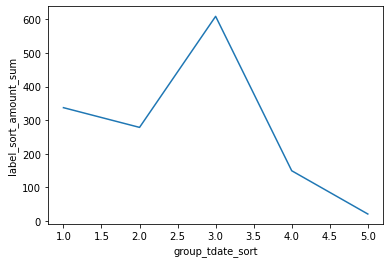

素材标签 20
最大消耗对应的天数 2


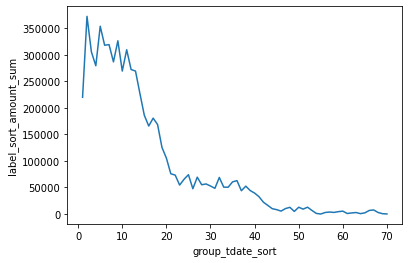

素材标签 25
最大消耗对应的天数 5


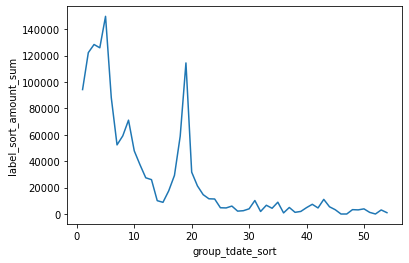

素材标签 26
最大消耗对应的天数 1


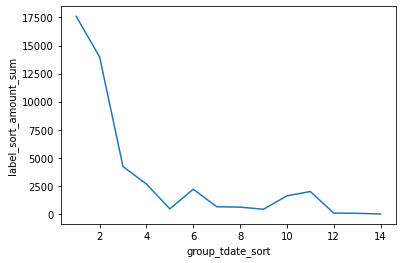

素材标签 27
最大消耗对应的天数 5


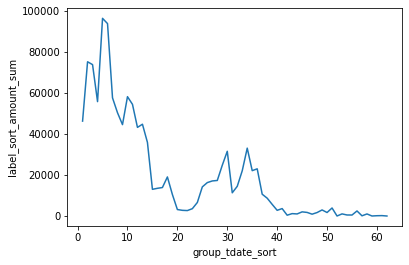

In [99]:
for label_id in label_date_amount['label_id'].unique():
    print('素材标签', label_id)
    data = label_date_amount[label_date_amount['label_id']==label_id]
    print('最大消耗对应的天数',int(data[data['label_sort_amount_sum']==data['label_sort_amount_sum'].max()]['group_tdate_sort'].values))
    plt.plot(data['group_tdate_sort'], data['label_sort_amount_sum'])
    plt.xlabel('group_tdate_sort')
    plt.ylabel('label_sort_amount_sum')
    plt.show()

In [80]:
image_date_amount.head()

,image_id,label_id,create_time,tdate,image_date_amount_sum,group_tdate_sort
0,20700,20,2020-03-19 20:00:35,2020-03-20,6136.38,1.0
1,20700,20,2020-03-19 20:00:35,2020-03-21,2535.90,2.0
2,20700,20,2020-03-19 20:00:35,2020-03-22,2535.85,3.0
32,20700,20,2020-03-19 20:00:35,2020-05-07,1635.74,4.0
34,20700,20,2020-03-19 20:00:35,2020-05-09,5287.65,5.0


In [81]:
groups_3 = image_date_amount.groupby('image_id')
image_amount_sum = groups_3['image_date_amount_sum'].agg([('image_amount_sum','sum')]).reset_index()

In [82]:
image_amount_sum.head()

,image_id,image_amount_sum
0,20700,373671.05
1,21369,227.86
2,21397,2213.21
3,21500,166461.58
4,21503,8708.49


In [84]:
image_amount_sum.sort_values('image_amount_sum',ascending=False)

,image_id,image_amount_sum
77,23552,1500404.20
84,23688,608946.51
76,23509,564987.91
151,24580,528173.91
70,23135,461361.07
...,...,...
164,25058,975.63
156,24875,808.84
1,21369,227.86
52,22357,211.59


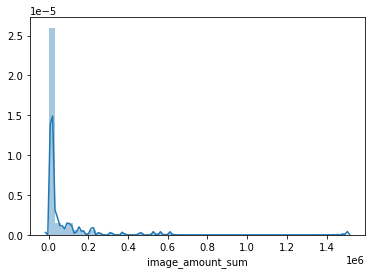

In [83]:
sns.distplot(image_amount_sum['image_amount_sum'])
plt.show()

In [85]:
image_amount_sum['amount_sort'] = image_amount_sum['image_amount_sum'].apply(lambda x:1 if x>=500000 else(2 if x>=200000 else (3 if x>=50000 else 4)))

In [86]:
image_date_amount = pd.merge(image_date_amount,image_amount_sum[['image_id','amount_sort']], on='image_id',how='left')

In [87]:
image_date_amount.head()

,image_id,label_id,create_time,tdate,image_date_amount_sum,group_tdate_sort,amount_sort
0,20700,20,2020-03-19 20:00:35,2020-03-20,6136.38,1.0,2
1,20700,20,2020-03-19 20:00:35,2020-03-21,2535.90,2.0,2
2,20700,20,2020-03-19 20:00:35,2020-03-22,2535.85,3.0,2
3,20700,20,2020-03-19 20:00:35,2020-05-07,1635.74,4.0,2
4,20700,20,2020-03-19 20:00:35,2020-05-09,5287.65,5.0,2


In [88]:
groups_4 = image_date_amount.groupby(['amount_sort','group_tdate_sort'])
amount_date_amount = groups_4['image_date_amount_sum'].agg([('amount_sort_amount_sum','sum')]).reset_index()

In [90]:
amount_date_amount.head()

,amount_sort,group_tdate_sort,amount_sort_amount_sum
0,1,1.0,28981.95
1,1,2.0,62382.84
2,1,3.0,76255.77
3,1,4.0,103326.93
4,1,5.0,227809.72


素材总消耗金额当档次 1
最大消耗对应的天数 5


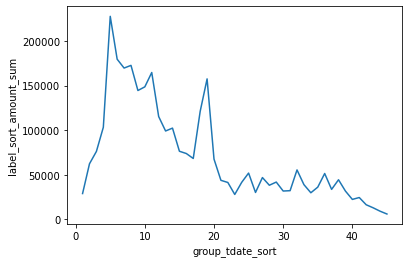

素材总消耗金额当档次 2
最大消耗对应的天数 9


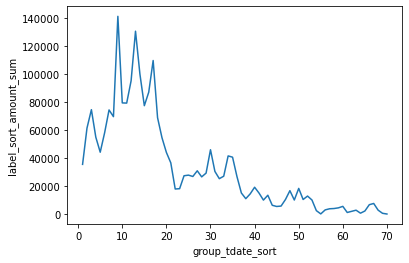

素材总消耗金额当档次 3
最大消耗对应的天数 5


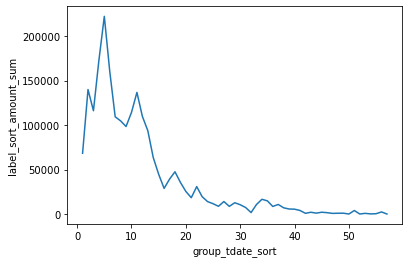

素材总消耗金额当档次 4
最大消耗对应的天数 2


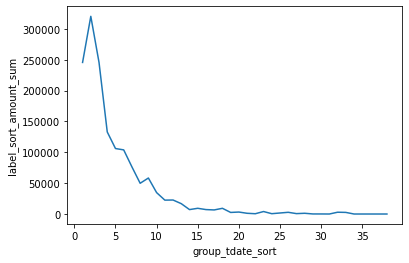

In [100]:
for amount_sort in amount_date_amount['amount_sort'].unique():
    print('素材总消耗金额当档次',amount_sort)
    data = amount_date_amount[amount_date_amount['amount_sort']==amount_sort]
    print('最大消耗对应的天数',int(data[data['amount_sort_amount_sum']==data['amount_sort_amount_sum'].max()]['group_tdate_sort'].values))
    plt.plot(data['group_tdate_sort'], data['amount_sort_amount_sum']) 
    plt.xlabel('group_tdate_sort')
    plt.ylabel('label_sort_amount_sum')
    plt.show()

In [114]:
df1 = pd.read_csv('./2020末日全年计划数据new.csv',index_col=0)
df2 = pd.read_csv('./计划数据.csv')

C:\Users\Administrator\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [115]:
df1.head()

,tdate,tdate_type,game_id,source_id,media_id,manager_id,amount,new_role_money,create_role_num,pay_role_user_num
0,2020-01-01 00:00:00,day,1000840,187935,10,12051,0.0,0,0,0
1,2020-01-01 00:00:00,day,1000840,188542,26,12051,0.0,0,0,0
2,2020-01-01 00:00:00,day,1000840,188899,26,12051,0.0,0,0,0
3,2020-01-01 00:00:00,day,1000840,189469,10,12051,0.0,0,0,0
4,2020-01-01 00:00:00,day,1000840,191609,26,12051,0.0,0,0,0


In [116]:
df2.head()

,tdate,tdate_type,game_id,source_id,media_id,manager_id,amount,new_role_money,create_role_num,pay_role_user_num
0,2018/7/30 00:00:00,week,1000840,191133,142,12325,0.0,0,0,0
1,2018/8/1 00:00:00,month,1000840,191133,142,12325,0.0,0,0,0
2,2018/8/5 00:00:00,day,1000840,191133,142,12325,0.0,0,0,0
3,2018/9/1 00:00:00,month,1000862,204476,16,12045,0.0,0,0,0
4,2018/9/17 00:00:00,week,1000862,204476,16,12045,0.0,0,0,0


In [ ]:
df3 = pd.DataFramea({'A':[1,2],'B:[]'})